In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from fastai import *
from fastai.vision import *

In [4]:
path = Path('images/Exp1/task/')

In [5]:
def get_y_fn(x):
    return x.parent.parent.parent/'labels'/x.name.replace("tif","png")

In [6]:
tfms = get_transforms(do_flip=True,
                      flip_vert=True,
                      max_rotate=90,
                      #max_lighting=0.0,
                      max_zoom=2,
                      #max_warp=0.0,
                      #p_affine=0.5,
                      #p_lighting=0.0,
                      #xtra_tfms=xtra_tfms,
                     )

In [7]:
files = get_image_files(path, recurse=True)
def spit_func(x):
    return x in val_files

### Results

Mean: 0.7342904806137085
Min: 0.6811798214912415
Max: 0.7516615986824036


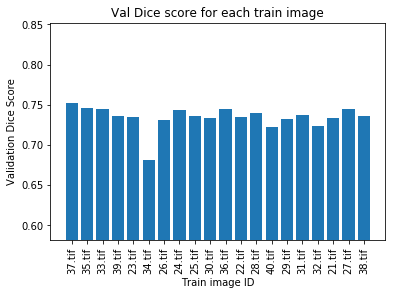

In [30]:
labels, sizes = zip(*[('{}'.format(key.name), dice_results[key]) for key in dice_results.keys()])
x_pos = [i for i, _ in enumerate(labels)]

print("Mean: {}".format(np.mean(sizes)))
print("Min: {}".format(min(sizes)))
print("Max: {}".format(max(sizes)))

plt.figure()
plt.bar(x_pos, sizes)
plt.ylim(min(sizes)-0.1, max(sizes)+0.1)
plt.xlabel("Train image ID")
plt.ylabel("Validation Dice Score")
plt.title("Val Dice score for each train image")


plt.xticks(x_pos, labels, rotation='vertical')
plt.show()

### Train on one image and validate on the rest

In [25]:
dice_results = {}
# iterate all images
for file in files:
    gc.collect()
    
    # copy twenty times the current train image
    train_files = []
    [train_files.append(file) for i in range(20)]
    
    # all files except train image are val images 
    val_files = [file for file in files if file not in train_files]
    
    
    valid = SegmentationItemList(val_files)
    train = SegmentationItemList(train_files)

    item_list = ItemLists(path, train, valid)
    item_list = item_list.label_from_func(get_y_fn, classes=['Bg', 'Fg'])
    data = item_list.transform(tfms, size=512, tfm_y=True)
    data = data.databunch(bs=4)
    data = data.normalize()
    
    print("Train Image: {}".format(list(set(data.train_ds.x.items))))
    
    #  create u-net with pre trained resnet 18
    learn = unet_learner(data, models.resnet18, metrics=[dice])
    
    # train just the head to warm up
    learn.fit_one_cycle(5, 1e-4)
    
    # finetune the complete network
    learn.unfreeze()
    for i in range(3):
        learn.fit_one_cycle(10, 1e-4)
        
    #save best dice score for each train images 
    dice_results[file] = max([to_np(i[0]) for i in  learn.recorder.metrics])

Train Image: [PosixPath('images/Exp1/task/train/37.tif')]


epoch,train_loss,valid_loss,dice,time
0,0.368977,0.389091,0.000087,00:04
1,0.327141,0.281032,0.007321,00:04
2,0.293048,0.233984,0.195298,00:04
3,0.263307,0.214539,0.413734,00:04
4,0.245024,0.202766,0.480810,00:04


epoch,train_loss,valid_loss,dice,time
0,0.181382,0.183639,0.544795,00:05
1,0.180911,0.162440,0.588072,00:05
2,0.174085,0.151635,0.649881,00:04
3,0.165913,0.130736,0.710358,00:04
4,0.163619,0.135173,0.664959,00:04
5,0.158429,0.124166,0.714647,00:04
6,0.155298,0.123745,0.730411,00:04
7,0.151700,0.122938,0.714531,00:04
8,0.148755,0.120764,0.725700,00:05
9,0.146692,0.120620,0.726047,00:04


epoch,train_loss,valid_loss,dice,time
0,0.131536,0.120184,0.729645,00:04
1,0.131056,0.121560,0.723990,00:04
2,0.131883,0.118248,0.732529,00:05
3,0.136386,0.136978,0.726417,00:04
4,0.140670,0.125886,0.736457,00:05
5,0.140153,0.122038,0.721323,00:05
6,0.140233,0.120789,0.736927,00:05
7,0.139125,0.119883,0.732900,00:05
8,0.137693,0.117703,0.740268,00:04
9,0.136364,0.117919,0.741023,00:05


epoch,train_loss,valid_loss,dice,time
0,0.128578,0.117110,0.738244,00:05
1,0.127948,0.116668,0.736236,00:04
2,0.125466,0.116181,0.744823,00:05
3,0.123573,0.113465,0.747845,00:05
4,0.123385,0.114482,0.750350,00:05
5,0.123173,0.113983,0.740008,00:05
6,0.123871,0.114440,0.751662,00:05
7,0.124553,0.114258,0.738985,00:05
8,0.124193,0.113709,0.750370,00:05
9,0.122937,0.114366,0.751415,00:04


Train Image: [PosixPath('images/Exp1/task/train/35.tif')]


epoch,train_loss,valid_loss,dice,time
0,0.498330,0.353773,0.000000,00:04
1,0.397590,0.651438,0.274245,00:04
2,0.373393,0.278191,0.124140,00:05
3,0.336210,0.241647,0.197821,00:05
4,0.308500,0.225792,0.163068,00:04


epoch,train_loss,valid_loss,dice,time
0,0.209290,0.213306,0.213977,00:05
1,0.200526,0.244701,0.305403,00:05
2,0.192219,0.155836,0.579952,00:04
3,0.181107,0.140501,0.669674,00:05
4,0.173953,0.141896,0.684571,00:05
5,0.167278,0.138598,0.662306,00:05
6,0.161783,0.128744,0.705954,00:05
7,0.158483,0.130727,0.689533,00:05
8,0.154177,0.128926,0.701915,00:05
9,0.151047,0.128512,0.703660,00:05


epoch,train_loss,valid_loss,dice,time
0,0.136962,0.128834,0.717425,00:05
1,0.135391,0.137522,0.678590,00:05
2,0.134478,0.139358,0.661215,00:05
3,0.134401,0.121929,0.720277,00:05
4,0.137899,0.123458,0.719100,00:05
5,0.137043,0.131824,0.684241,00:05
6,0.134983,0.120776,0.725898,00:05
7,0.134984,0.121673,0.729147,00:05
8,0.132663,0.121742,0.726184,00:04
9,0.132255,0.121914,0.725898,00:05


epoch,train_loss,valid_loss,dice,time
0,0.124506,0.122905,0.721568,00:05
1,0.124159,0.119848,0.728600,00:05
2,0.123608,0.122089,0.713314,00:05
3,0.122862,0.118207,0.733654,00:04
4,0.121958,0.116416,0.731140,00:05
5,0.120152,0.114184,0.742943,00:05
6,0.120030,0.114633,0.745458,00:05
7,0.119825,0.113670,0.742108,00:05
8,0.118943,0.113220,0.742040,00:05
9,0.119790,0.113460,0.741718,00:05


Train Image: [PosixPath('images/Exp1/task/train/33.tif')]


epoch,train_loss,valid_loss,dice,time
0,0.377358,0.367804,0.000818,00:05
1,0.330173,0.325362,0.017189,00:05
2,0.284376,0.210173,0.292579,00:04
3,0.252260,0.182209,0.571258,00:05
4,0.230131,0.168353,0.566193,00:04


epoch,train_loss,valid_loss,dice,time
0,0.164647,0.158973,0.595620,00:05
1,0.160917,0.155597,0.575702,00:05
2,0.157900,0.142927,0.645765,00:05
3,0.154409,0.139317,0.636307,00:05
4,0.150758,0.137710,0.675415,00:05
5,0.146040,0.127240,0.701544,00:04
6,0.143109,0.129727,0.722098,00:05
7,0.140251,0.129050,0.698216,00:05
8,0.137152,0.125736,0.717339,00:05
9,0.134378,0.125850,0.719457,00:05


epoch,train_loss,valid_loss,dice,time
0,0.121386,0.126998,0.725475,00:05
1,0.123679,0.123958,0.712761,00:05
2,0.125659,0.132341,0.690299,00:05
3,0.125818,0.139109,0.662482,00:05
4,0.125756,0.125580,0.700335,00:05
5,0.125205,0.119352,0.730542,00:05
6,0.123844,0.120537,0.720804,00:05
7,0.123834,0.119960,0.727492,00:05
8,0.122255,0.120468,0.729516,00:05
9,0.121661,0.121023,0.728117,00:05


epoch,train_loss,valid_loss,dice,time
0,0.115015,0.119474,0.735173,00:05
1,0.116197,0.120205,0.718450,00:05
2,0.118573,0.118669,0.729692,00:05
3,0.117818,0.119239,0.737740,00:05
4,0.117589,0.118335,0.742730,00:05
5,0.116641,0.115270,0.736507,00:05
6,0.114659,0.115912,0.735115,00:05
7,0.113511,0.114379,0.742495,00:05
8,0.113167,0.114077,0.744265,00:05
9,0.112425,0.114044,0.744078,00:05


Train Image: [PosixPath('images/Exp1/task/train/39.tif')]


epoch,train_loss,valid_loss,dice,time
0,0.504950,0.485816,0.000000,00:05
1,0.426229,0.335104,0.000156,00:04
2,0.358846,0.263192,0.401830,00:05
3,0.316885,0.213542,0.305612,00:05
4,0.286285,0.191772,0.522578,00:05


epoch,train_loss,valid_loss,dice,time
0,0.191147,0.187384,0.585501,00:05
1,0.188181,0.168421,0.539761,00:05
2,0.182434,0.174079,0.666704,00:05
3,0.178610,0.152540,0.593989,00:05
4,0.174397,0.153758,0.563069,00:05
5,0.169707,0.135068,0.695966,00:05
6,0.166150,0.133923,0.705576,00:05
7,0.161959,0.132412,0.704585,00:05
8,0.160812,0.132185,0.698954,00:05
9,0.158764,0.132023,0.700586,00:05


epoch,train_loss,valid_loss,dice,time
0,0.141414,0.131391,0.706490,00:05
1,0.142910,0.129917,0.702096,00:05
2,0.147077,0.131565,0.697243,00:04
3,0.144180,0.136166,0.670468,00:05
4,0.142944,0.128064,0.725082,00:05
5,0.141937,0.127379,0.727494,00:05
6,0.141046,0.123183,0.718260,00:05
7,0.140304,0.122819,0.724142,00:05
8,0.138670,0.125640,0.711177,00:05
9,0.138305,0.124704,0.714388,00:05


epoch,train_loss,valid_loss,dice,time
0,0.132361,0.124851,0.730106,00:05
1,0.133438,0.137243,0.686593,00:05
2,0.133435,0.121630,0.723410,00:05
3,0.132400,0.125000,0.722100,00:05
4,0.131994,0.131009,0.731954,00:05
5,0.131924,0.121837,0.736511,00:05
6,0.132264,0.122932,0.735268,00:05
7,0.131933,0.122534,0.727935,00:05
8,0.131002,0.122407,0.722320,00:05
9,0.130678,0.121167,0.725654,00:05


Train Image: [PosixPath('images/Exp1/task/train/23.tif')]


epoch,train_loss,valid_loss,dice,time
0,0.458568,0.419408,0.000000,00:05
1,0.353949,0.363408,0.000063,00:04
2,0.310358,0.302134,0.050729,00:04
3,0.276129,0.251789,0.133427,00:05
4,0.251563,0.248820,0.084444,00:05


epoch,train_loss,valid_loss,dice,time
0,0.173867,0.203962,0.456071,00:05
1,0.173365,0.212513,0.395690,00:05
2,0.173832,0.169738,0.576789,00:05
3,0.164777,0.160673,0.610086,00:05
4,0.153300,0.153941,0.647618,00:05
5,0.144936,0.153042,0.646697,00:05
6,0.137903,0.152721,0.671702,00:05
7,0.133385,0.147361,0.692388,00:05
8,0.127924,0.143939,0.688296,00:05
9,0.123592,0.145102,0.685008,00:05


epoch,train_loss,valid_loss,dice,time
0,0.104110,0.144396,0.687395,00:05
1,0.103393,0.148013,0.683461,00:05
2,0.103537,0.167966,0.637734,00:05
3,0.105938,0.140463,0.693459,00:05
4,0.104773,0.137480,0.712661,00:05
5,0.102739,0.139981,0.703316,00:05
6,0.101928,0.136857,0.718742,00:05
7,0.100287,0.141009,0.709234,00:05
8,0.100320,0.136832,0.720930,00:05
9,0.098600,0.137069,0.721299,00:05


epoch,train_loss,valid_loss,dice,time
0,0.093618,0.137094,0.721225,00:05
1,0.089572,0.135659,0.724031,00:05
2,0.088766,0.137218,0.718773,00:05
3,0.089258,0.134901,0.727794,00:05
4,0.088576,0.135314,0.714524,00:05
5,0.088385,0.135661,0.722294,00:05
6,0.088234,0.130712,0.734454,00:05
7,0.087188,0.129002,0.732972,00:04
8,0.086388,0.129221,0.734104,00:05
9,0.085642,0.129241,0.734478,00:05


Train Image: [PosixPath('images/Exp1/task/train/34.tif')]


epoch,train_loss,valid_loss,dice,time
0,0.793674,0.419500,0.000000,00:05
1,0.637332,0.334965,0.000591,00:04
2,0.553758,0.308495,0.021630,00:04
3,0.489933,0.277891,0.045254,00:05
4,0.440458,0.268906,0.131717,00:05


epoch,train_loss,valid_loss,dice,time
0,0.297579,0.253117,0.288897,00:05
1,0.287460,0.252000,0.211047,00:05
2,0.292109,0.198229,0.522572,00:05
3,0.289548,0.182827,0.423793,00:05
4,0.276836,0.259104,0.245104,00:05
5,0.267100,0.175754,0.516589,00:05
6,0.259297,0.174961,0.491001,00:05
7,0.255362,0.154994,0.600040,00:05
8,0.249421,0.157413,0.570747,00:05
9,0.243145,0.158248,0.564372,00:04


epoch,train_loss,valid_loss,dice,time
0,0.222447,0.171387,0.496416,00:05
1,0.219937,0.153193,0.592849,00:04
2,0.222235,0.148253,0.612632,00:05
3,0.220457,0.165485,0.512011,00:05
4,0.217644,0.170138,0.485285,00:05
5,0.219906,0.153404,0.579239,00:05
6,0.218441,0.138814,0.647505,00:05
7,0.215532,0.153929,0.564782,00:05
8,0.214981,0.146543,0.596464,00:05
9,0.212389,0.143682,0.611153,00:05


epoch,train_loss,valid_loss,dice,time
0,0.213269,0.141759,0.624419,00:05
1,0.203637,0.151402,0.579527,00:05
2,0.205951,0.134414,0.656452,00:05
3,0.205885,0.151162,0.555190,00:05
4,0.212398,0.144048,0.599799,00:04
5,0.207022,0.169867,0.507052,00:05
6,0.207336,0.130622,0.681180,00:05
7,0.205643,0.141512,0.619357,00:05
8,0.202629,0.135079,0.646746,00:05
9,0.201504,0.134653,0.647652,00:05


Train Image: [PosixPath('images/Exp1/task/train/26.tif')]


epoch,train_loss,valid_loss,dice,time
0,0.463687,0.350607,0.000698,00:04
1,0.409320,0.339650,0.000570,00:05
2,0.349694,0.272351,0.073670,00:05
3,0.306459,0.228453,0.328324,00:04
4,0.277152,0.213264,0.346077,00:04


epoch,train_loss,valid_loss,dice,time
0,0.186681,0.199655,0.462098,00:05
1,0.181273,0.175518,0.557376,00:05
2,0.181658,0.171188,0.615834,00:05
3,0.180027,0.170385,0.592797,00:05
4,0.174633,0.154707,0.616733,00:05
5,0.168257,0.144839,0.689150,00:05
6,0.162525,0.143321,0.698065,00:04
7,0.157902,0.138464,0.703479,00:05
8,0.154520,0.136683,0.702579,00:05
9,0.152063,0.136153,0.702832,00:05


epoch,train_loss,valid_loss,dice,time
0,0.131264,0.138686,0.706275,00:05
1,0.133724,0.134401,0.708538,00:05
2,0.133316,0.129414,0.707959,00:05
3,0.134443,0.149539,0.674523,00:05
4,0.136393,0.132788,0.681403,00:05
5,0.136278,0.133338,0.695730,00:05
6,0.135047,0.133832,0.702703,00:05
7,0.133070,0.132685,0.703683,00:05
8,0.131929,0.133228,0.711336,00:05
9,0.131107,0.132312,0.710897,00:05


epoch,train_loss,valid_loss,dice,time
0,0.140388,0.130168,0.713975,00:05
1,0.134678,0.136489,0.722412,00:05
2,0.132480,0.131628,0.699232,00:05
3,0.130449,0.130584,0.699189,00:05
4,0.130632,0.128592,0.722162,00:05
5,0.128493,0.125465,0.725062,00:05
6,0.127238,0.130194,0.730999,00:05
7,0.127034,0.125002,0.724818,00:04
8,0.126267,0.124427,0.730359,00:05
9,0.125499,0.124619,0.731457,00:05


Train Image: [PosixPath('images/Exp1/task/train/24.tif')]


epoch,train_loss,valid_loss,dice,time
0,1.028212,0.404036,0.000000,00:04
1,0.704187,0.392350,0.017208,00:05
2,0.567431,0.289578,0.102805,00:04
3,0.478993,0.232731,0.327198,00:04
4,0.422038,0.210445,0.390167,00:05


epoch,train_loss,valid_loss,dice,time
0,0.240386,0.186210,0.531733,00:05
1,0.246697,0.224026,0.632416,00:05
2,0.239018,0.156293,0.603937,00:05
3,0.226867,0.143469,0.630709,00:05
4,0.217257,0.140485,0.688444,00:05
5,0.210069,0.136053,0.694434,00:05
6,0.203401,0.140944,0.701451,00:05
7,0.198404,0.132862,0.699616,00:05
8,0.194515,0.133644,0.705174,00:05
9,0.189710,0.132571,0.709064,00:05


epoch,train_loss,valid_loss,dice,time
0,0.170398,0.135418,0.710678,00:05
1,0.170972,0.132481,0.714896,00:05
2,0.171098,0.126211,0.718814,00:05
3,0.169023,0.133585,0.675021,00:05
4,0.168723,0.121933,0.709534,00:05
5,0.168054,0.122667,0.719577,00:05
6,0.166469,0.135748,0.724872,00:05
7,0.165840,0.119404,0.721306,00:05
8,0.165934,0.120737,0.728859,00:05
9,0.163955,0.122193,0.731487,00:05


epoch,train_loss,valid_loss,dice,time
0,0.153905,0.125476,0.732552,00:05
1,0.152313,0.120215,0.729686,00:04
2,0.152939,0.118903,0.714829,00:04
3,0.154917,0.120780,0.736982,00:05
4,0.155820,0.127269,0.736623,00:05
5,0.156026,0.123698,0.739154,00:05
6,0.155347,0.117715,0.740183,00:05
7,0.154667,0.118782,0.742255,00:04
8,0.153786,0.117408,0.742719,00:05
9,0.153941,0.118470,0.742918,00:05


Train Image: [PosixPath('images/Exp1/task/train/25.tif')]


epoch,train_loss,valid_loss,dice,time
0,0.751458,0.434047,0.000000,00:05
1,0.575133,0.308249,0.000127,00:04
2,0.485344,0.260478,0.013786,00:05
3,0.427237,0.262255,0.469964,00:05
4,0.384990,0.226808,0.456181,00:05


epoch,train_loss,valid_loss,dice,time
0,0.254238,0.211611,0.547915,00:05
1,0.243427,0.195648,0.630768,00:05
2,0.231364,0.151109,0.644515,00:05
3,0.226091,0.168580,0.674642,00:05
4,0.216671,0.157260,0.695278,00:05
5,0.208814,0.160350,0.688976,00:05
6,0.202141,0.137008,0.709139,00:05
7,0.197235,0.153129,0.700304,00:05
8,0.192344,0.145969,0.706180,00:05
9,0.188721,0.146318,0.706248,00:05


epoch,train_loss,valid_loss,dice,time
0,0.170033,0.158835,0.695311,00:05
1,0.166266,0.150457,0.705461,00:05
2,0.167059,0.142403,0.716600,00:04
3,0.168070,0.138598,0.720929,00:05
4,0.166982,0.136540,0.723040,00:05
5,0.165900,0.147729,0.714535,00:05
6,0.163613,0.137822,0.723259,00:05
7,0.162977,0.142948,0.719861,00:05
8,0.162291,0.142488,0.721104,00:05
9,0.161004,0.142359,0.721329,00:05


epoch,train_loss,valid_loss,dice,time
0,0.154802,0.142065,0.722035,00:05
1,0.156997,0.143889,0.722024,00:05
2,0.168833,0.135360,0.726469,00:05
3,0.167572,0.134953,0.725639,00:05
4,0.165643,0.149494,0.712917,00:05
5,0.162979,0.150876,0.713751,00:05
6,0.160452,0.128162,0.736172,00:05
7,0.158627,0.139024,0.726638,00:05
8,0.156478,0.141031,0.724487,00:05
9,0.155882,0.140627,0.724804,00:05


Train Image: [PosixPath('images/Exp1/task/train/30.tif')]


epoch,train_loss,valid_loss,dice,time
0,0.558361,0.609953,0.000000,00:05
1,0.469305,0.303495,0.000125,00:05
2,0.408364,0.290650,0.027543,00:05
3,0.365562,0.258023,0.053670,00:04
4,0.334643,0.246915,0.105074,00:05


epoch,train_loss,valid_loss,dice,time
0,0.236081,0.230291,0.312883,00:05
1,0.223392,0.193216,0.470137,00:05
2,0.210650,0.170385,0.611815,00:05
3,0.200342,0.155590,0.657151,00:05
4,0.191398,0.145963,0.654134,00:05
5,0.183889,0.143738,0.636275,00:05
6,0.179155,0.159183,0.691776,00:05
7,0.174575,0.143295,0.683630,00:05
8,0.171638,0.138610,0.689966,00:05
9,0.168200,0.138445,0.693715,00:05


epoch,train_loss,valid_loss,dice,time
0,0.146402,0.144416,0.706273,00:05
1,0.144439,0.135871,0.686637,00:05
2,0.145075,0.131397,0.707853,00:05
3,0.145052,0.138729,0.719084,00:05
4,0.144649,0.135737,0.722995,00:05
5,0.143362,0.136323,0.724317,00:05
6,0.142656,0.129411,0.726605,00:04
7,0.142204,0.132195,0.727658,00:05
8,0.140651,0.127919,0.728681,00:05
9,0.138971,0.127125,0.728520,00:05


epoch,train_loss,valid_loss,dice,time
0,0.128536,0.128111,0.729381,00:05
1,0.131866,0.128960,0.730463,00:05
2,0.132994,0.157636,0.711074,00:05
3,0.139371,0.124398,0.731085,00:05
4,0.140135,0.127702,0.731938,00:05
5,0.138418,0.132384,0.729139,00:05
6,0.137869,0.124918,0.732139,00:05
7,0.136474,0.128837,0.733560,00:05
8,0.136243,0.125292,0.734012,00:04
9,0.135151,0.124593,0.733620,00:05


Train Image: [PosixPath('images/Exp1/task/train/36.tif')]


epoch,train_loss,valid_loss,dice,time
0,0.542899,0.330084,0.022863,00:05
1,0.445372,0.360979,0.362273,00:05
2,0.375428,0.291287,0.544977,00:04
3,0.333733,0.203318,0.337937,00:05
4,0.306387,0.191875,0.545245,00:05


epoch,train_loss,valid_loss,dice,time
0,0.207617,0.181647,0.597597,00:05
1,0.201870,0.151562,0.645167,00:05
2,0.220422,0.218838,0.659789,00:05
3,0.222843,0.178387,0.668383,00:05
4,0.215346,0.140845,0.678925,00:05
5,0.209116,0.132992,0.689438,00:05
6,0.202864,0.137316,0.708985,00:05
7,0.197374,0.135533,0.713541,00:05
8,0.192553,0.128781,0.710859,00:05
9,0.188642,0.128435,0.709698,00:05


epoch,train_loss,valid_loss,dice,time
0,0.166328,0.127950,0.709950,00:05
1,0.165643,0.133290,0.720048,00:05
2,0.164129,0.129692,0.724788,00:05
3,0.165050,0.128846,0.730016,00:05
4,0.165785,0.126087,0.707466,00:05
5,0.165349,0.128623,0.728841,00:05
6,0.168270,0.126397,0.732400,00:05
7,0.167279,0.128583,0.730018,00:05
8,0.165705,0.121245,0.725505,00:05
9,0.164301,0.121695,0.723769,00:05


epoch,train_loss,valid_loss,dice,time
0,0.161757,0.121608,0.731176,00:05
1,0.156098,0.120436,0.731599,00:05
2,0.154046,0.120920,0.736788,00:05
3,0.152786,0.134154,0.734217,00:05
4,0.151763,0.118899,0.743086,00:05
5,0.150278,0.121563,0.742911,00:05
6,0.147459,0.116615,0.741865,00:05
7,0.146572,0.119206,0.744473,00:05
8,0.145428,0.116642,0.743514,00:05
9,0.145578,0.116460,0.741169,00:05


Train Image: [PosixPath('images/Exp1/task/train/22.tif')]


epoch,train_loss,valid_loss,dice,time
0,1.257373,0.451622,0.000000,00:04
1,0.815322,0.361819,0.000051,00:05
2,0.640720,0.323897,0.000008,00:04
3,0.541593,0.287195,0.005055,00:05
4,0.481523,0.272134,0.008042,00:05


epoch,train_loss,valid_loss,dice,time
0,0.283438,0.254412,0.016752,00:05
1,0.269031,0.224472,0.125734,00:05
2,0.282149,0.245936,0.335518,00:05
3,0.274244,0.194234,0.419715,00:04
4,0.260442,0.169657,0.593446,00:05
5,0.243552,0.159718,0.556308,00:05
6,0.231688,0.149515,0.628158,00:05
7,0.219808,0.148501,0.633559,00:05
8,0.210714,0.146380,0.662034,00:05
9,0.203525,0.146776,0.667768,00:05


epoch,train_loss,valid_loss,dice,time
0,0.159207,0.144798,0.668752,00:05
1,0.160755,0.143990,0.672155,00:05
2,0.158337,0.140323,0.699086,00:05
3,0.156860,0.138559,0.709718,00:05
4,0.155198,0.130046,0.694269,00:05
5,0.154417,0.127745,0.695593,00:05
6,0.153637,0.137827,0.717463,00:04
7,0.152234,0.126007,0.705191,00:05
8,0.151315,0.126624,0.717651,00:05
9,0.148740,0.128147,0.719659,00:05


epoch,train_loss,valid_loss,dice,time
0,0.144031,0.133242,0.720882,00:05
1,0.141587,0.125874,0.703574,00:04
2,0.141012,0.128484,0.724411,00:05
3,0.138911,0.131484,0.729857,00:05
4,0.138582,0.126172,0.733536,00:05
5,0.139714,0.130080,0.731590,00:05
6,0.140499,0.127178,0.731454,00:05
7,0.139623,0.122894,0.733204,00:05
8,0.140127,0.121919,0.733794,00:05
9,0.139521,0.121835,0.734230,00:05


Train Image: [PosixPath('images/Exp1/task/train/28.tif')]


epoch,train_loss,valid_loss,dice,time
0,0.415450,0.343763,0.000005,00:04
1,0.365847,0.357431,0.263661,00:04
2,0.318828,0.229950,0.320353,00:04
3,0.285956,0.203584,0.495293,00:04
4,0.263239,0.201136,0.565590,00:04


epoch,train_loss,valid_loss,dice,time
0,0.195487,0.173987,0.536732,00:05
1,0.192400,0.167315,0.644470,00:05
2,0.186437,0.145898,0.635056,00:05
3,0.179041,0.142060,0.663115,00:05
4,0.176333,0.153543,0.700863,00:05
5,0.172391,0.155847,0.701136,00:05
6,0.169815,0.133031,0.701234,00:05
7,0.168029,0.141190,0.708400,00:05
8,0.165026,0.130651,0.707683,00:05
9,0.162455,0.129860,0.708982,00:05


epoch,train_loss,valid_loss,dice,time
0,0.142822,0.135868,0.716371,00:05
1,0.146018,0.126270,0.705910,00:04
2,0.146599,0.128492,0.721402,00:05
3,0.145896,0.140185,0.715913,00:05
4,0.148449,0.153593,0.660002,00:05
5,0.151268,0.127053,0.697912,00:05
6,0.150521,0.128532,0.702353,00:05
7,0.149134,0.128205,0.694728,00:05
8,0.147432,0.126428,0.716716,00:05
9,0.146788,0.127250,0.715259,00:05


epoch,train_loss,valid_loss,dice,time
0,0.150341,0.125906,0.718804,00:05
1,0.141532,0.129189,0.733735,00:05
2,0.140493,0.118350,0.733933,00:05
3,0.138152,0.122664,0.733590,00:05
4,0.138660,0.117555,0.731405,00:04
5,0.137176,0.116095,0.731756,00:05
6,0.136661,0.120637,0.740199,00:04
7,0.135764,0.116919,0.738395,00:05
8,0.135109,0.117385,0.738492,00:05
9,0.134184,0.116183,0.739296,00:05


Train Image: [PosixPath('images/Exp1/task/train/40.tif')]


epoch,train_loss,valid_loss,dice,time
0,0.339385,0.352831,0.000234,00:05
1,0.315452,0.284685,0.003582,00:05
2,0.277095,0.270004,0.123907,00:04
3,0.249579,0.241608,0.231793,00:05
4,0.229802,0.222309,0.315390,00:05


epoch,train_loss,valid_loss,dice,time
0,0.163565,0.200938,0.411915,00:05
1,0.160111,0.175105,0.611660,00:05
2,0.158942,0.161656,0.586598,00:05
3,0.153217,0.164206,0.604169,00:05
4,0.148266,0.164017,0.584253,00:05
5,0.143041,0.143720,0.659379,00:05
6,0.141094,0.139194,0.689864,00:05
7,0.138414,0.148591,0.664273,00:04
8,0.136772,0.143529,0.672782,00:05
9,0.134391,0.141774,0.677522,00:05


epoch,train_loss,valid_loss,dice,time
0,0.120915,0.137104,0.686342,00:05
1,0.124684,0.136361,0.684575,00:04
2,0.129398,0.143341,0.657359,00:05
3,0.128161,0.138207,0.680233,00:05
4,0.125797,0.135254,0.687901,00:05
5,0.123686,0.131068,0.695428,00:05
6,0.123531,0.130523,0.710374,00:05
7,0.121735,0.128938,0.714709,00:05
8,0.120182,0.127312,0.718986,00:05
9,0.118783,0.127121,0.716954,00:05


epoch,train_loss,valid_loss,dice,time
0,0.114909,0.128870,0.703376,00:05
1,0.113824,0.125493,0.711537,00:04
2,0.116187,0.130648,0.694157,00:05
3,0.117059,0.126983,0.702079,00:04
4,0.115580,0.123830,0.711827,00:05
5,0.116364,0.126334,0.721762,00:05
6,0.116661,0.125755,0.704300,00:05
7,0.115751,0.124080,0.707095,00:05
8,0.114799,0.122432,0.714862,00:05
9,0.113962,0.122037,0.714830,00:05


Train Image: [PosixPath('images/Exp1/task/train/29.tif')]


epoch,train_loss,valid_loss,dice,time
0,0.465803,0.442696,0.000009,00:05
1,0.384526,0.260509,0.238849,00:04
2,0.318119,0.232463,0.221463,00:05
3,0.277769,0.199806,0.491682,00:04
4,0.252391,0.185473,0.482885,00:05


epoch,train_loss,valid_loss,dice,time
0,0.174141,0.176629,0.534787,00:05
1,0.170572,0.164000,0.575277,00:05
2,0.169191,0.152284,0.642354,00:05
3,0.169597,0.153012,0.606196,00:05
4,0.170203,0.151586,0.641269,00:05
5,0.166480,0.144220,0.639416,00:05
6,0.163190,0.139928,0.671897,00:05
7,0.160398,0.141867,0.658324,00:05
8,0.157112,0.141747,0.674392,00:05
9,0.155126,0.142122,0.677551,00:05


epoch,train_loss,valid_loss,dice,time
0,0.145841,0.141738,0.688344,00:05
1,0.145269,0.139872,0.688770,00:05
2,0.146100,0.138596,0.681933,00:05
3,0.145592,0.129390,0.690097,00:04
4,0.143459,0.128279,0.706035,00:05
5,0.140679,0.126372,0.712760,00:05
6,0.138919,0.122691,0.720258,00:05
7,0.136938,0.122961,0.716403,00:05
8,0.137266,0.123492,0.721759,00:05
9,0.137120,0.123286,0.721842,00:05


epoch,train_loss,valid_loss,dice,time
0,0.131533,0.123807,0.717182,00:05
1,0.132891,0.127129,0.726269,00:05
2,0.130063,0.121721,0.716172,00:05
3,0.130842,0.127159,0.726469,00:05
4,0.132554,0.122426,0.725310,00:05
5,0.131779,0.123316,0.731650,00:05
6,0.131515,0.120914,0.718044,00:05
7,0.130971,0.120931,0.732705,00:05
8,0.130292,0.119525,0.722418,00:05
9,0.129159,0.119522,0.721527,00:05


Train Image: [PosixPath('images/Exp1/task/train/31.tif')]


epoch,train_loss,valid_loss,dice,time
0,0.336507,0.451481,0.005321,00:04
1,0.384473,0.346978,0.001659,00:04
2,0.335623,0.309619,0.025563,00:05
3,0.305951,0.276642,0.086415,00:04
4,0.279913,0.250962,0.075900,00:05


epoch,train_loss,valid_loss,dice,time
0,0.193209,0.218659,0.258374,00:05
1,0.183427,0.202041,0.305407,00:05
2,0.171267,0.204367,0.269702,00:05
3,0.161158,0.168406,0.540709,00:05
4,0.150404,0.173403,0.521573,00:05
5,0.142204,0.149900,0.632441,00:05
6,0.136072,0.136301,0.677679,00:05
7,0.131492,0.136866,0.675901,00:05
8,0.127672,0.135204,0.683349,00:05
9,0.124937,0.133745,0.689935,00:05


epoch,train_loss,valid_loss,dice,time
0,0.110194,0.132496,0.696462,00:05
1,0.109724,0.138278,0.684493,00:04
2,0.113064,0.126808,0.722182,00:05
3,0.112085,0.139792,0.676253,00:05
4,0.111190,0.126103,0.719496,00:05
5,0.110105,0.127307,0.715953,00:05
6,0.107610,0.124830,0.715569,00:05
7,0.106830,0.130737,0.697222,00:05
8,0.106346,0.126071,0.717839,00:05
9,0.105636,0.124713,0.723135,00:05


epoch,train_loss,valid_loss,dice,time
0,0.102704,0.126944,0.719290,00:05
1,0.102318,0.123053,0.736618,00:05
2,0.104197,0.147812,0.670835,00:05
3,0.105621,0.140810,0.662191,00:05
4,0.105386,0.144461,0.660234,00:05
5,0.105328,0.129917,0.715627,00:05
6,0.103947,0.120913,0.730198,00:05
7,0.103876,0.127489,0.708356,00:05
8,0.102184,0.131639,0.699167,00:05
9,0.101118,0.129933,0.702497,00:05


Train Image: [PosixPath('images/Exp1/task/val/32.tif')]


epoch,train_loss,valid_loss,dice,time
0,0.897297,0.536879,0.000166,00:05
1,0.626024,0.431420,0.044431,00:05
2,0.499069,0.313208,0.086368,00:05
3,0.420468,0.258461,0.072991,00:04
4,0.370929,0.250738,0.067598,00:05


epoch,train_loss,valid_loss,dice,time
0,0.200096,0.212461,0.255112,00:05
1,0.191440,0.230988,0.173006,00:05
2,0.188665,0.179151,0.419389,00:05
3,0.181802,0.159493,0.525076,00:05
4,0.175589,0.160763,0.583022,00:05
5,0.169969,0.165903,0.535442,00:04
6,0.165010,0.138691,0.665982,00:05
7,0.160523,0.138634,0.668809,00:05
8,0.156335,0.142963,0.655229,00:05
9,0.153241,0.141205,0.664388,00:05


epoch,train_loss,valid_loss,dice,time
0,0.145405,0.137005,0.694556,00:05
1,0.140456,0.150416,0.618005,00:05
2,0.139704,0.134588,0.693937,00:05
3,0.139839,0.155151,0.595039,00:05
4,0.137135,0.127774,0.703038,00:05
5,0.134850,0.126486,0.714216,00:05
6,0.133391,0.126771,0.717707,00:05
7,0.132448,0.129211,0.696365,00:05
8,0.130260,0.127107,0.704228,00:05
9,0.129815,0.126936,0.704682,00:05


epoch,train_loss,valid_loss,dice,time
0,0.123422,0.125848,0.715021,00:05
1,0.125179,0.130766,0.684678,00:05
2,0.123779,0.124985,0.720702,00:05
3,0.122873,0.138077,0.723742,00:05
4,0.124155,0.129494,0.721629,00:05
5,0.124645,0.125715,0.703619,00:05
6,0.124307,0.122413,0.712317,00:05
7,0.122580,0.123886,0.708353,00:05
8,0.122759,0.125995,0.708080,00:05
9,0.122101,0.125048,0.712581,00:05


Train Image: [PosixPath('images/Exp1/task/val/21.tif')]


epoch,train_loss,valid_loss,dice,time
0,2.251590,0.378515,0.000723,00:05
1,1.327629,0.334180,0.000035,00:04
2,0.956276,0.348994,0.000004,00:05
3,0.751676,0.290136,0.009532,00:04
4,0.625386,0.271216,0.038660,00:05


epoch,train_loss,valid_loss,dice,time
0,0.228076,0.233269,0.147718,00:05
1,0.214534,0.213555,0.182363,00:05
2,0.198102,0.191602,0.369625,00:05
3,0.190576,0.159887,0.608333,00:05
4,0.178671,0.151516,0.595216,00:05
5,0.168435,0.154587,0.610108,00:05
6,0.158854,0.150568,0.673417,00:05
7,0.151720,0.143000,0.690998,00:05
8,0.145919,0.139713,0.689659,00:05
9,0.141818,0.139352,0.688248,00:05


epoch,train_loss,valid_loss,dice,time
0,0.114854,0.138860,0.686644,00:05
1,0.116421,0.139309,0.683706,00:05
2,0.114171,0.139570,0.688450,00:05
3,0.119754,0.139757,0.658405,00:05
4,0.119056,0.140489,0.676669,00:05
5,0.117299,0.137077,0.675562,00:05
6,0.115161,0.130873,0.690440,00:05
7,0.112554,0.127918,0.708421,00:05
8,0.110952,0.130253,0.701075,00:05
9,0.109872,0.131281,0.698435,00:05


epoch,train_loss,valid_loss,dice,time
0,0.103571,0.129967,0.705478,00:05
1,0.102514,0.129394,0.711962,00:05
2,0.102370,0.127138,0.721581,00:05
3,0.102660,0.140262,0.693712,00:05
4,0.102690,0.129362,0.708576,00:05
5,0.103329,0.132124,0.710514,00:04
6,0.104000,0.127073,0.733177,00:05
7,0.102644,0.131842,0.702661,00:05
8,0.101686,0.128906,0.709263,00:05
9,0.101130,0.127074,0.712359,00:05


Train Image: [PosixPath('images/Exp1/task/val/27.tif')]


epoch,train_loss,valid_loss,dice,time
0,0.529220,0.446298,0.001457,00:05
1,0.435611,0.396708,0.065853,00:04
2,0.371388,0.251507,0.159232,00:05
3,0.324763,0.206221,0.500469,00:05
4,0.293002,0.186819,0.441648,00:04


epoch,train_loss,valid_loss,dice,time
0,0.193020,0.178042,0.488875,00:05
1,0.186130,0.169715,0.502857,00:05
2,0.182737,0.153648,0.673488,00:05
3,0.179957,0.145179,0.652551,00:05
4,0.176471,0.139376,0.646710,00:04
5,0.169007,0.132419,0.693330,00:05
6,0.164390,0.129905,0.706224,00:05
7,0.161010,0.129014,0.704652,00:05
8,0.158496,0.129835,0.716998,00:05
9,0.156423,0.130203,0.717167,00:05


epoch,train_loss,valid_loss,dice,time
0,0.137529,0.127204,0.713854,00:05
1,0.140046,0.125776,0.720593,00:05
2,0.140311,0.123979,0.715526,00:05
3,0.145147,0.129938,0.722889,00:05
4,0.144428,0.123320,0.718891,00:05
5,0.141666,0.121343,0.715415,00:05
6,0.140759,0.119278,0.729853,00:05
7,0.138772,0.118203,0.724081,00:05
8,0.137484,0.117743,0.735254,00:05
9,0.135036,0.117986,0.737181,00:05


epoch,train_loss,valid_loss,dice,time
0,0.146520,0.118502,0.738000,00:05
1,0.137757,0.118190,0.731517,00:05
2,0.139916,0.115827,0.739923,00:05
3,0.137450,0.116683,0.729788,00:05
4,0.137773,0.118038,0.724971,00:05
5,0.137005,0.116055,0.729922,00:05
6,0.136096,0.116237,0.745277,00:05
7,0.135713,0.113955,0.741277,00:05
8,0.133896,0.114166,0.738988,00:05
9,0.133009,0.114218,0.739638,00:05


Train Image: [PosixPath('images/Exp1/task/val/38.tif')]


epoch,train_loss,valid_loss,dice,time
0,0.601668,0.548710,0.000000,00:05
1,0.474846,0.385531,0.150810,00:05
2,0.400973,0.292015,0.462130,00:04
3,0.354023,0.208321,0.254575,00:04
4,0.321625,0.194615,0.399010,00:05


epoch,train_loss,valid_loss,dice,time
0,0.211431,0.188707,0.376287,00:05
1,0.203078,0.163286,0.574545,00:05
2,0.193776,0.174051,0.440053,00:05
3,0.186724,0.140194,0.675421,00:05
4,0.180629,0.144380,0.631975,00:05
5,0.173940,0.140585,0.654586,00:05
6,0.168621,0.133877,0.699711,00:05
7,0.165455,0.135292,0.683310,00:05
8,0.162669,0.133673,0.694754,00:05
9,0.159844,0.132231,0.700177,00:05


epoch,train_loss,valid_loss,dice,time
0,0.148401,0.132176,0.701607,00:05
1,0.144051,0.130842,0.691277,00:05
2,0.141056,0.134224,0.678860,00:05
3,0.141731,0.127432,0.699836,00:05
4,0.142076,0.127362,0.712069,00:05
5,0.141773,0.129443,0.726618,00:05
6,0.142863,0.126903,0.717175,00:04
7,0.141783,0.127784,0.732391,00:05
8,0.140526,0.123723,0.721964,00:05
9,0.138941,0.124049,0.717209,00:05


epoch,train_loss,valid_loss,dice,time
0,0.128985,0.126141,0.703409,00:05
1,0.128587,0.125497,0.711074,00:04
2,0.127355,0.126399,0.726097,00:05
3,0.127960,0.126574,0.734400,00:05
4,0.129566,0.135114,0.690036,00:05
5,0.129811,0.125761,0.734055,00:05
6,0.129104,0.121475,0.715015,00:05
7,0.127274,0.119853,0.735513,00:05
8,0.126736,0.120217,0.728517,00:05
9,0.126441,0.121279,0.722081,00:05


Mean: 0.7342904806137085
Min: 0.6811798214912415
Max: 0.7516615986824036


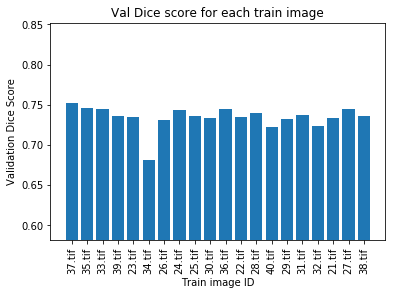

In [31]:
labels, sizes = zip(*[('{}'.format(key.name), dice_results[key]) for key in dice_results.keys()])
x_pos = [i for i, _ in enumerate(labels)]

print("Mean: {}".format(np.mean(sizes)))
print("Min: {}".format(min(sizes)))
print("Max: {}".format(max(sizes)))

plt.figure()
plt.bar(x_pos, sizes)
plt.ylim(min(sizes)-0.1, max(sizes)+0.1)
plt.xlabel("Train image ID")
plt.ylabel("Validation Dice Score")
plt.title("Val Dice score for each train image")


plt.xticks(x_pos, labels, rotation='vertical')
plt.show()

### Validation  Dice score for each train image

In [29]:
dice_results

{PosixPath('images/Exp1/task/train/37.tif'): array(0.751662, dtype=float32),
 PosixPath('images/Exp1/task/train/35.tif'): array(0.745458, dtype=float32),
 PosixPath('images/Exp1/task/train/33.tif'): array(0.744265, dtype=float32),
 PosixPath('images/Exp1/task/train/39.tif'): array(0.736511, dtype=float32),
 PosixPath('images/Exp1/task/train/23.tif'): array(0.734478, dtype=float32),
 PosixPath('images/Exp1/task/train/34.tif'): array(0.68118, dtype=float32),
 PosixPath('images/Exp1/task/train/26.tif'): array(0.731457, dtype=float32),
 PosixPath('images/Exp1/task/train/24.tif'): array(0.742918, dtype=float32),
 PosixPath('images/Exp1/task/train/25.tif'): array(0.736172, dtype=float32),
 PosixPath('images/Exp1/task/train/30.tif'): array(0.734012, dtype=float32),
 PosixPath('images/Exp1/task/train/36.tif'): array(0.744473, dtype=float32),
 PosixPath('images/Exp1/task/train/22.tif'): array(0.73423, dtype=float32),
 PosixPath('images/Exp1/task/train/28.tif'): array(0.740199, dtype=float32),
 

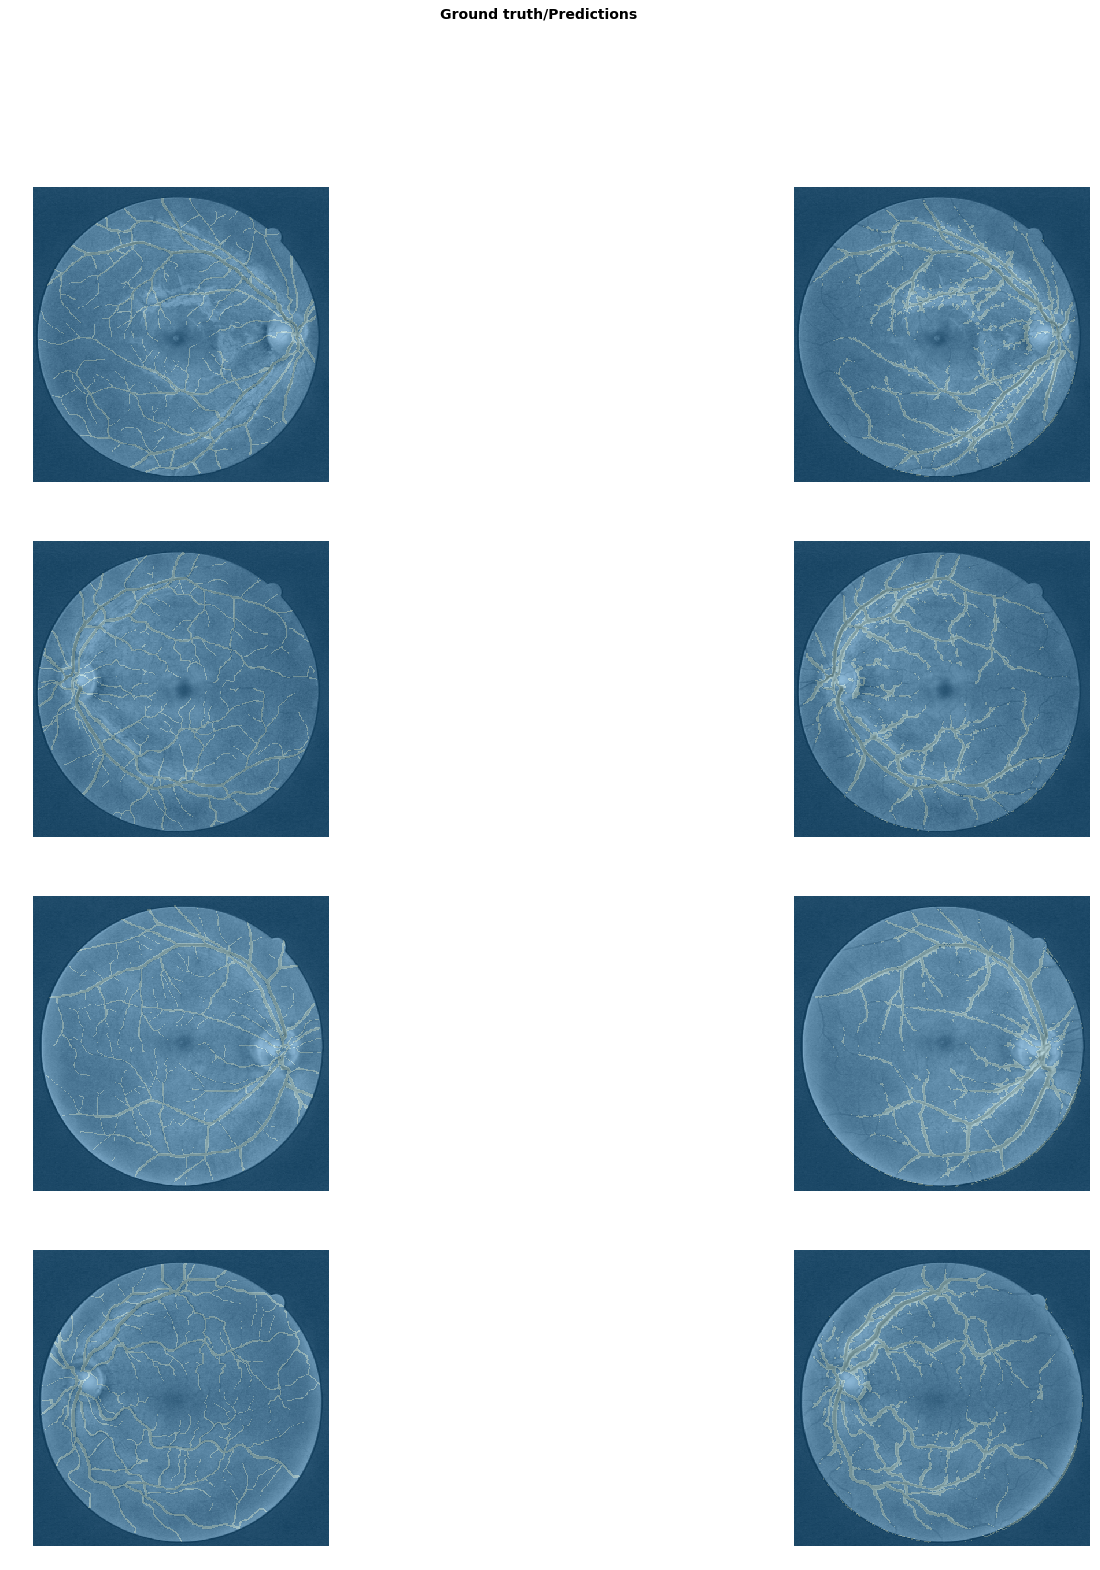

In [24]:
learn.show_results(rows=7, figsize=(25,25))